# Regresion Lineal 

### Paquete scikt-learn para regresiones lineales


In [1]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/Users/Z420/AnacondaProjects/python-ml-course-master/datasets/ads/Advertising.csv")

### Correlacion para ver con que variable es mejor hacer la prediccion

In [3]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


##### Variables que vamos a rankear para que sean utiles al aplicar el modelo.

In [4]:
feature_cols = ["TV", "Radio", "Newspaper"]

In [5]:
X = data[feature_cols]
y = data['Sales']

In [6]:
estimator = SVR(kernel = "linear")
selector =RFE(estimator, 2, step = 1)
selector =selector.fit(X,y)

In [7]:
selector.support_

array([ True,  True, False])

### En este caso  'TV', 'Radio' son viables.
* Usuaremos unicamente TV

Text(0,0.5,'Sales')

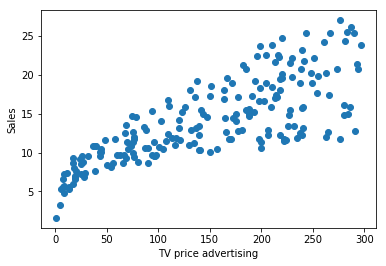

In [8]:
plt.scatter(data['TV'], data['Sales'])
plt.xlabel('TV price advertising')
plt.ylabel('Sales')

In [9]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
X_train = X_train[["TV"]]

In [12]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lm.intercept_

7.175905817692672

In [14]:
lm.coef_

array([0.04625968])

### Nuestra ecuacion quedaria
$$ y = 7.175905817692672 + {0.04625968}X$$

In [15]:
lm.score(X_train,y_train)

0.5913812076476573

In [16]:
y_pred = lm.predict(X_test[['TV']])

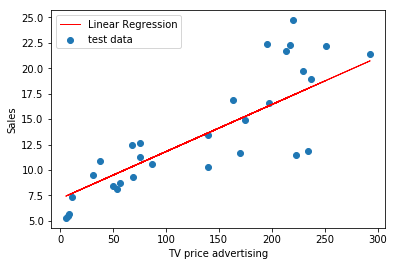

In [17]:
plt.scatter(X_test['TV'], y_test, label = 'test data')
plt.xlabel('TV price advertising')
plt.ylabel('Sales')
plt.plot(X_test['TV'], y_pred, color='red', linewidth=1, label= 'Linear Regression')
plt.legend()

In [26]:
data['pred']= 7.175905817692672+0.04625968*data['TV']
data.head(10)


,TV,Radio,Newspaper,Sales,pred
0,230.1,37.8,69.2,22.1,17.820258
1,44.5,39.3,45.1,10.4,9.234462
2,17.2,45.9,69.3,9.3,7.971572
3,151.5,41.3,58.5,18.5,14.184247
4,180.8,10.8,58.4,12.9,15.539656
5,8.7,48.9,75.0,7.2,7.578365
6,57.5,32.8,23.5,11.8,9.835837
7,120.2,19.6,11.6,13.2,12.736319
8,8.6,2.1,1.0,4.8,7.573739
9,199.8,2.6,21.2,10.6,16.418590
